In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load experiment results
df = pd.read_csv('../results/bso_experiments.csv')

# Ensure parameters are treated as numeric
params = ['n_bees', 'max_steps', 'n_chance', 'max_iter', 'flip']
for p in params:
    df[p] = pd.to_numeric(df[p], errors='coerce')

# Unique benchmarks
graphs = df['graph'].unique()
print("Loaded data for graphs:", graphs)


Loaded data for graphs: ['test1.txt' 'test2.txt' 'test3.txt' 'test4.txt' 'test_medium40.txt'
 'test_small20.txt']


In [3]:
# Find best (lowest) fitness per graph
best_params = []
for g in graphs:
    sub = df[df['graph'] == g]
    idx = sub['fitness'].idxmin()
    row = sub.loc[idx]
    best_params.append(row[['graph', 'seed', 'n_bees', 'max_steps', 'n_chance', 'max_iter', 'flip', 'fitness', 'conflicts', 'colors']])
best_df = pd.DataFrame(best_params).reset_index(drop=True)
print("Best parameters per graph:")
best_df


Best parameters per graph:


,graph,seed,n_bees,max_steps,n_chance,max_iter,flip,fitness,conflicts,colors
0,test1.txt,42,10,15,3,20,5,71,0,71
1,test2.txt,42,20,15,5,50,7,295,0,295
2,test3.txt,42,50,15,5,100,7,631,0,631
3,test4.txt,42,50,15,3,100,5,638,0,638
4,test_medium40.txt,42,50,15,3,20,3,21,0,21
5,test_small20.txt,42,50,15,1,20,7,9,0,9


In [ ]:
# a function that plots x by y for all graphs 
def plot_x_by_y(x, y):
    plt.figure()
    for g in graphs:
        sub = df[df['graph'] == g]
        agg = sub.groupby(x)[y].mean().sort_index()
        plt.plot(agg.index, agg.values, marker='o', label=g)
    plt.title(f'Mean {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(f'Mean {y}')
    plt.legend()
    plt.grid(True)
    plt.show()

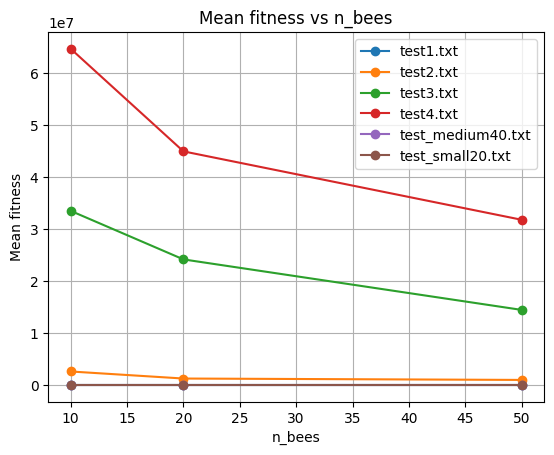

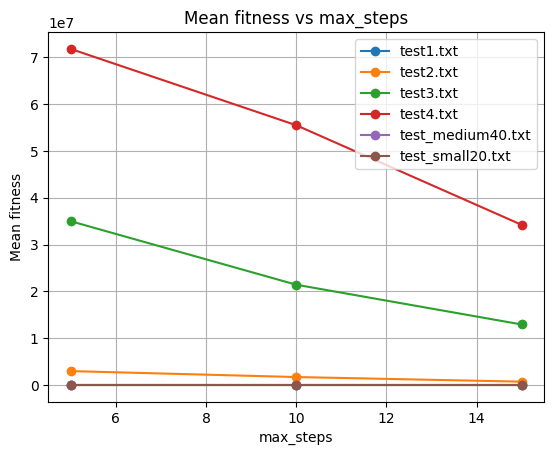

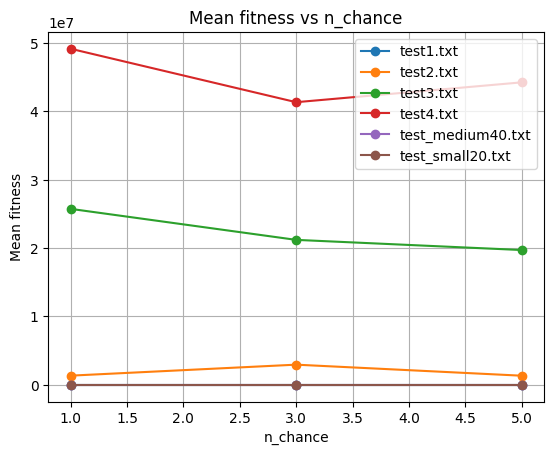

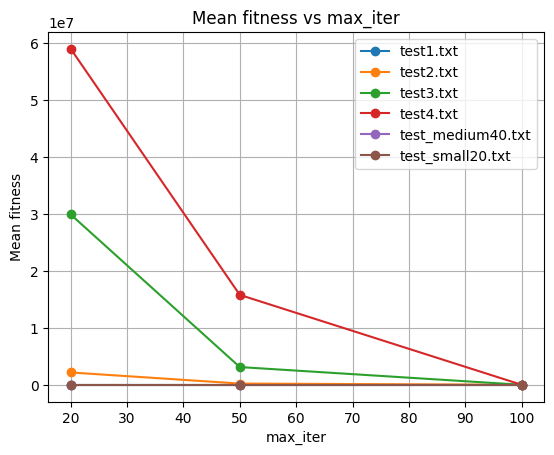

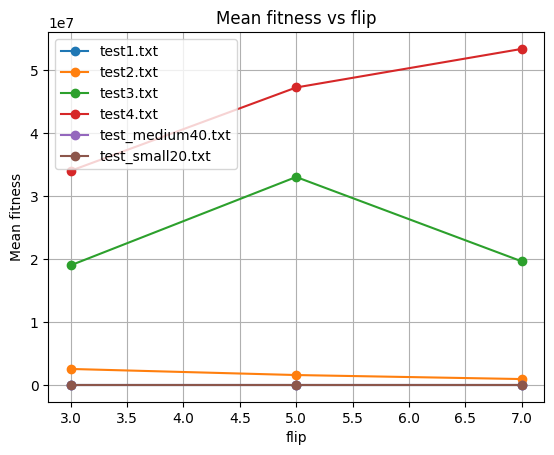

In [7]:
# Plot mean fitness vs each parameter, one chart per parameter
for p in params:
    plot_x_by_y(p, 'fitness')


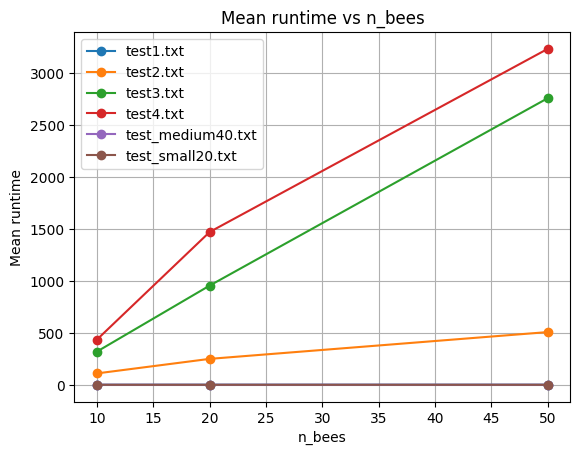

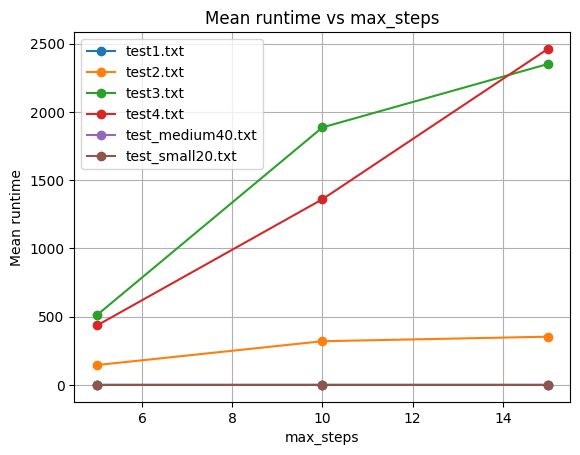

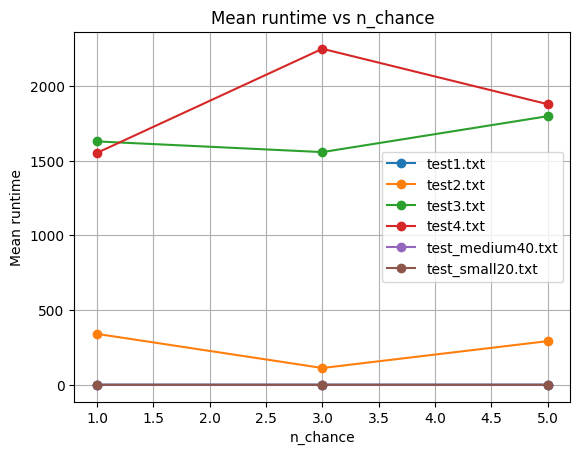

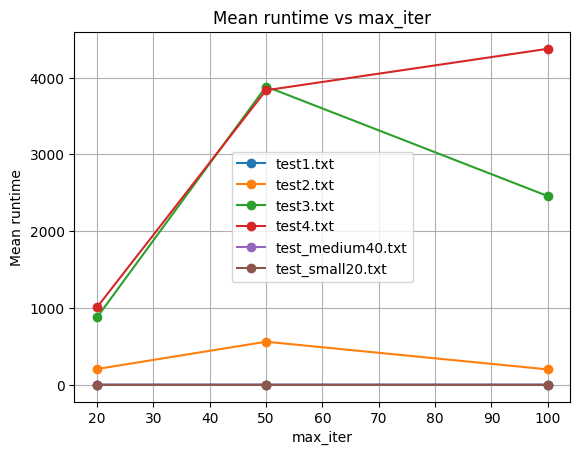

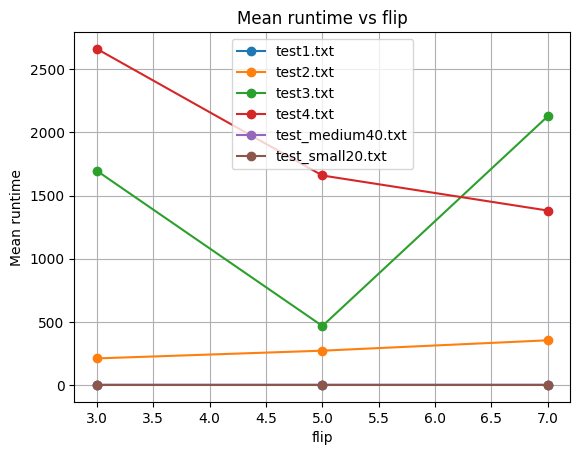

In [8]:
# Plot mean runtime vs each parameter, one chart per parameter
for p in params:
    plot_x_by_y(p, 'runtime')
